<a href="https://colab.research.google.com/github/MrJiaTu/-/blob/master/%E5%8F%AF%E8%A7%86%E5%8C%96%E8%87%AA%E5%8A%A8%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install schedule


In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive"
os.chdir(path)
pathname = os.listdir(path)
print(pathname)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
['2019年 12月南昌服装设计业务能力表.xlsx', 'Explore example（副本）.gsheet', '2019年 12月南昌视觉平面业务能力表.xlsx', 'Colab Notebooks', '无标题电子表格.gsheet', 'My cool spreadsheet.gsheet', '3.jpg', '2019年 12月南昌日语小组业务能力表.xlsx', '韩语.jpg', '服装.jpg', '平面.jpg', '2019年 12月南昌韩语小组业务能力表.xlsx', '2020年 1月南昌服装设计业务能力表.xlsx', '2020年 1月南昌韩语小组业务能力表.xlsx', '2020年 1月南昌视觉平面业务能力表.xlsx', '日语.jpg', '2020年 1月南昌日语小组业务能力表.xlsx']


In [3]:
##建立字体以免中文乱码

!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://uslogger.com/download/file/SimHei"

--2020-08-11 14:58:54--  https://uslogger.com/download/file/SimHei
Resolving uslogger.com (uslogger.com)... 47.105.83.70
Connecting to uslogger.com (uslogger.com)|47.105.83.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.30M   133KB/s    in 73s     

2020-08-11 15:00:09 (130 KB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [9751960/9751960]



In [4]:
import requests
import json
import smtplib
import hashlib

import base64

class WxTalk():
    """
     微信webhook消息发送
    """
    headers = {
        "Content-Type": "application/json"
    }
    req_message = {
        "errcode": 1,
        "errmessage": ""
    }
    def __init__(self, webhook):
        """
        :param webhook: webhook，只需要URL后面webhook=后面的值
        """
        self.webhook = webhook
    def sendmessage(self,user, message):
        """
        :param message: 发送的消息
        :return: errcode  1 正常，0失败
        """
        data = {
            ##"msgtype":"image"
            "msgtype": "text",
            "text": {
                "content": str(message)
            },
            "@": {
                "atMobiles": [
                    user
                ],
                "isAtAll": True
            }
        }
        post_url = "https://qyapi.weixin.qq.com/cgi-bin/webhook/send?key={0}".format(self.webhook)
        try:
            req = requests.post(post_url, data=json.dumps(data), headers=self.headers,timeout=10)
            if req.status_code == 200 and req.json()["errcode"] == 0:
                return self.req_message  # 发送成功
            else:
                self.req_message["errcode"] = 0
                self.req_message["errmessage"] = str(req.json())
                return self.req_message # 发送失败
        except Exception as e:
            self.req_message["errcode"] = 0
            self.req_message["errmessage"] = "请求微信企业失败，监测你的网络是否正常"
            return self.req_message  # 请求失败
    def sendImage(self, image_path):
        '''
        :param url:   传入企业微信机器人webhoot
        :param image_path:  本地图片路径
        :return:
        '''
        with open(image_path, "br") as f:
            fcont = f.read()
            # 转化图片的base64
            ls_f = base64.b64encode(fcont)
            # 计算图片的md5
            fmd5 = hashlib.md5(fcont)
        data = {"msgtype": "image", "image": {"base64": ls_f.decode('utf8'), "md5": fmd5.hexdigest()}}
        ##data_json = json.dumps(data)
        ##print('推送的json%s' % data_json)
        ##prequte = requests.post(url, data=data_json)
        ##return prequte.text
        post_url = "https://qyapi.weixin.qq.com/cgi-bin/webhook/send?key={0}".format(self.webhook)
        try:
            req = requests.post(post_url, data=json.dumps(data), headers=self.headers,timeout=10)
            if req.status_code == 200 and req.json()["errcode"] == 0:
                return self.req_message  # 发送成功
            else:
                self.req_message["errcode"] = 0
                self.req_message["errmessage"] = str(req.json())
                return self.req_message # 发送失败
        except Exception as e:
            self.req_message["errcode"] = 0
            self.req_message["errmessage"] = "请求微信企业失败，监测你的网络是否正常"
            return self.req_message  # 请求失败


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


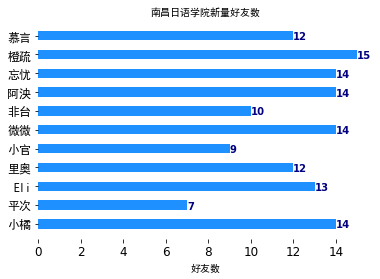

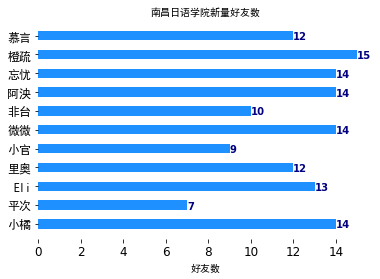

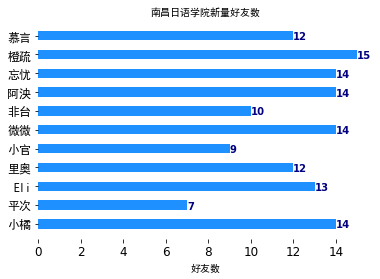

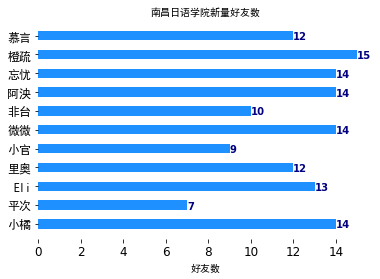

KeyboardInterrupt: ignored

In [5]:
##读取数据做条形图可视化
import xlrd as ex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl
import time
import schedule
import threading
import queue
from datetime import datetime
import time
def makejapanImg():
  zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
  plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
  file = '2020年 1月南昌日语小组业务能力表.xlsx'
  x = []
  y =  []
  wb = ex.open_workbook(filename=file)
  sheet = wb.sheet_by_name("过程数据播报") 
    ##print(sheet.col_values(0)[2:13])
  x = list(sheet.col_values(0)[2:13]) 
    ##print(x)
    ##print(sheet.col_values(2)[2:13])
  y = list(sheet.col_values(2)[2:13])
    ##去除空格值，用0替代
  y = [ '0' if i =='' else i for i in y]
    ##print(y)
  y = list(map(int,y))
    ##组合
  fig, ax = plt.subplots()
    ##数据条图
  barh = plt.barh(range(len(x)),y,height=0.5, color='dodgerblue')
  plt.yticks(range(len(x)),x,fontproperties=zhfont)
      ##plt.grid(alpha=0.3)  # 添加网格
  plt.ylabel('',fontproperties=zhfont)
  plt.xlabel('好友数',fontproperties=zhfont)
  plt.title('南昌日语学院新量好友数',fontproperties=zhfont)
  plt.tick_params(labelsize=12)
    #删除所有边框
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
    ##设置数字标签
  for y, x in enumerate(y):
        plt.text(x, y-0.2, "%s" %x,color="navy",weight ="bold")
      ##保存图片
  fig.savefig('日语.jpg',bbox_inches='tight',dpi=320)
  plt.show()
def makedesignImg():
  zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
  plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
  file = '2020年 1月南昌视觉平面业务能力表.xlsx'
  x = []
  y =  []
  wb = ex.open_workbook(filename=file)
  sheet = wb.sheet_by_name("过程数据播报") 
    ##print(sheet.col_values(0)[2:14])
  x = list(sheet.col_values(0)[2:14]) 
    ##print(x)
    ##print(sheet.col_values(2)[2:14])
  y = list(sheet.col_values(2)[2:14])
    ##去除空格值，用0替代
  y = [ '0' if i =='' else i for i in y]
    ##print(y)
  y = list(map(int,y))
    ##组合
  fig, ax = plt.subplots()
    ##数据条图
  barh = plt.barh(range(len(x)),y,height=0.5, color='dodgerblue')
  plt.yticks(range(len(x)),x,fontproperties=zhfont)
      ##plt.grid(alpha=0.3)  # 添加网格
  plt.ylabel('',fontproperties=zhfont)
  plt.xlabel('好友数',fontproperties=zhfont)
  plt.title('南昌平面学院新量好友数',fontproperties=zhfont)
  plt.tick_params(labelsize=12)
    #删除所有边框
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
    ##设置数字标签
  for y, x in enumerate(y):
        plt.text(x, y-0.2, "%s" %x,color="navy",weight ="bold")
      ##保存图片
  fig.savefig('平面.jpg',bbox_inches='tight',dpi=320)
  plt.show()
def makeclothImg():
  zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
  plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
  file = '2020年 1月南昌服装设计业务能力表.xlsx'
  x = []
  y =  []
  wb = ex.open_workbook(filename=file)
  sheet = wb.sheet_by_name("过程数据播报") 
    ##print(sheet.col_values(0)[2:5])
  x = list(sheet.col_values(0)[2:5]) 
    ##print(x)
    ##print(sheet.col_values(2)[2:5])
  y = list(sheet.col_values(2)[2:5])
    ##去除空格值，用0替代
  y = [ '0' if i =='' else i for i in y]
    ##print(y)
  y = list(map(int,y))
    ##组合
  fig, ax = plt.subplots()
    ##数据条图
  barh = plt.barh(range(len(x)),y,height=0.5, color='dodgerblue')
  plt.yticks(range(len(x)),x,fontproperties=zhfont)
      ##plt.grid(alpha=0.3)  # 添加网格
  plt.ylabel('',fontproperties=zhfont)
  plt.xlabel('好友数',fontproperties=zhfont)
  plt.title('服装学院新量好友数',fontproperties=zhfont)
  plt.tick_params(labelsize=12)
    #删除所有边框
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
    ##设置数字标签
  for y, x in enumerate(y):
        plt.text(x, y-0.2, "%s" %x,color="navy",weight ="bold")
      ##保存图片
  fig.savefig('服装.jpg',bbox_inches='tight',dpi=320)
  plt.show()
def makeHYImg():
  zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
  plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
  file = '2020年 1月南昌韩语小组业务能力表.xlsx'
  x = []
  y =  []
  wb = ex.open_workbook(filename=file)
  sheet = wb.sheet_by_name("过程数据播报") 
    ##print(sheet.col_values(0)[2:5])
  x = list(sheet.col_values(0)[2:5]) 
    ##print(x)
    ##print(sheet.col_values(2)[2:5])
  y = list(sheet.col_values(2)[2:5])
    ##去除空格值，用0替代
  y = [ '0' if i =='' else i for i in y]
    ##print(y)
  y = list(map(int,y))
    ##组合
  fig, ax = plt.subplots()
    ##数据条图
  barh = plt.barh(range(len(x)),y,height=0.5, color='dodgerblue')
  plt.yticks(range(len(x)),x,fontproperties=zhfont)
      ##plt.grid(alpha=0.3)  # 添加网格
  plt.ylabel('',fontproperties=zhfont)
  plt.xlabel('好友数',fontproperties=zhfont)
  plt.title('韩语学院新量好友数',fontproperties=zhfont)
  plt.tick_params(labelsize=12)
    #删除所有边框

  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
    ##设置数字标签
  for y, x in enumerate(y):
        plt.text(x, y-0.2, "%s" %x,color="navy",weight ="bold")
      ##保存图片
  fig.savefig('韩语.jpg',bbox_inches='tight',dpi=320)
  plt.show()
  
def sendry1():
 makejapanImg()
 dtack = WxTalk("78ce17e1-c176-419f-bb2e-a91d03c58b97")
 ret1 = dtack.sendImage("/content/drive/My Drive/日语.jpg")
schedule.every(1).minutes.do(sendry1)
while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:
dtack = WxTalk("78ce17e1-c176-419f-bb2e-a91d03c58b97")
ret3 = 

In [ ]:
dtack = WxTalk("78ce17e1-c176-419f-bb2e-a91d03c58b97")
ret4 = dtack.sendImage("/content/drive/My Drive/平面.jpg")